# MNIST
### Default TensorFlow Example
This first example uses the TensorFlow mnist and mnist.train modules to load and batch the data.
After this I show how to load and batch the data directly.

In [24]:
from __future__ import print_function
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import os
import struct
from tensorflow.examples.tutorials.mnist import input_data

# Config the matplotlib backend as plotting inline in IPython
%matplotlib inline

In [3]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [39]:
sample_image = train_x[0][0]
sample_label = train_x[1][0]
print(type(sample_image), sample_image.shape, sample_image.dtype)
print(type(sample_label), sample_label.shape, sample_label.dtype, sample_label)

<type 'numpy.ndarray'> (784,) float32
<type 'numpy.ndarray'> (10,) float64 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]


In [47]:
batch_size = 100

x = tf.placeholder(tf.float32, [None, 784])
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))
y = tf.nn.softmax(tf.matmul(x, W) + b)

y_ = tf.placeholder(tf.float32, [None, 10])

cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y),
                                              reduction_indices=[1]))

train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)
for i in range(1000):
  batch_xs, batch_ys = mnist.train.next_batch(100)
  sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})
    
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print(sess.run(accuracy, feed_dict={x: mnist.test.images, y_: mnist.test.labels}))



0.9186


In [34]:
train_x, train_y = mnist.train.next_batch(100)

(28, 28)


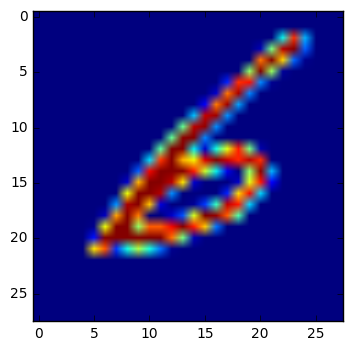

In [8]:
sample_image = train_x[0][0].reshape(28,28)
print(sample_image.shape)
plt.figure()
plt.imshow(sample_image)  # display it

In [35]:
sample_image = train_x[0][0]
sample_label = train_x[1]
print(type(sample_image), sample_image.shape, sample_image.dtype)
print(type(sample_label), sample_label.shape, sample_label.dtype)

<type 'numpy.ndarray'> (784,) float32
<type 'numpy.ndarray'> (100, 10) float64


# MNIST 
Here the data is loaded, formatted, and batched using helper functions.
This is similar to the procedure that would need to be done for other datasets.
This uses code from [here](https://github.com/aymericdamien/TensorFlow-Examples).
Also look at example TensorFlow download helper functions [here](https://github.com/tensorflow/tensorflow/blob/master/tensorflow/contrib/learn/python/learn/datasets/mnist.py).

In [48]:
"""Functions for downloading and reading MNIST data."""
from __future__ import print_function
import gzip
import os
import urllib
import numpy
SOURCE_URL = 'http://yann.lecun.com/exdb/mnist/'

def maybe_download(filename, work_directory):
  """Download the data from Yann's website, unless it's already here."""
  if not os.path.exists(work_directory):
    os.mkdir(work_directory)
  filepath = os.path.join(work_directory, filename)
  if not os.path.exists(filepath):
    filepath, _ = urllib.urlretrieve(SOURCE_URL + filename, filepath)
    statinfo = os.stat(filepath)
    print('Succesfully downloaded', filename, statinfo.st_size, 'bytes.')
  return filepath

def _read32(bytestream):
  dt = numpy.dtype(numpy.uint32).newbyteorder('>')
  return numpy.frombuffer(bytestream.read(4), dtype=dt)

def extract_images(filename):
  """Extract the images into a 4D uint8 numpy array [index, y, x, depth]."""
  print('Extracting', filename)
  with gzip.open(filename) as bytestream:
    magic = _read32(bytestream)
    if magic != 2051:
      raise ValueError(
          'Invalid magic number %d in MNIST image file: %s' %
          (magic, filename))
    num_images = _read32(bytestream)
    rows = _read32(bytestream)
    cols = _read32(bytestream)
    buf = bytestream.read(rows * cols * num_images)
    data = numpy.frombuffer(buf, dtype=numpy.uint8)
    data = data.reshape(num_images, rows, cols, 1)
    return data

def dense_to_one_hot(labels_dense, num_classes=10):
  """Convert class labels from scalars to one-hot vectors."""
  num_labels = labels_dense.shape[0]
  index_offset = numpy.arange(num_labels) * num_classes
  labels_one_hot = numpy.zeros((num_labels, num_classes))
  labels_one_hot.flat[index_offset + labels_dense.ravel()] = 1
  return labels_one_hot

def extract_labels(filename, one_hot=False):
  """Extract the labels into a 1D uint8 numpy array [index]."""
  print('Extracting', filename)
  with gzip.open(filename) as bytestream:
    magic = _read32(bytestream)
    if magic != 2049:
      raise ValueError(
          'Invalid magic number %d in MNIST label file: %s' %
          (magic, filename))
    num_items = _read32(bytestream)
    buf = bytestream.read(num_items)
    labels = numpy.frombuffer(buf, dtype=numpy.uint8)
    if one_hot:
      return dense_to_one_hot(labels)
    return labels

class DataSet(object):
  def __init__(self, images, labels, fake_data=False):
    if fake_data:
      self._num_examples = 10000
    else:
      assert images.shape[0] == labels.shape[0], (
          "images.shape: %s labels.shape: %s" % (images.shape,
                                                 labels.shape))
      self._num_examples = images.shape[0]
      # Convert shape from [num examples, rows, columns, depth]
      # to [num examples, rows*columns] (assuming depth == 1)
      assert images.shape[3] == 1
      images = images.reshape(images.shape[0],
                              images.shape[1] * images.shape[2])
      # Convert from [0, 255] -> [0.0, 1.0].
      images = images.astype(numpy.float32)
      images = numpy.multiply(images, 1.0 / 255.0)
    self._images = images
    self._labels = labels
    self._epochs_completed = 0
    self._index_in_epoch = 0
  @property
  def images(self):
    return self._images
  @property
  def labels(self):
    return self._labels
  @property
  def num_examples(self):
    return self._num_examples
  @property
  def epochs_completed(self):
    return self._epochs_completed
  def next_batch(self, batch_size, fake_data=False):
    """Return the next `batch_size` examples from this data set."""
    if fake_data:
      fake_image = [1.0 for _ in xrange(784)]
      fake_label = 0
      return [fake_image for _ in xrange(batch_size)], [
          fake_label for _ in xrange(batch_size)]
    start = self._index_in_epoch
    self._index_in_epoch += batch_size
    if self._index_in_epoch > self._num_examples:
      # Finished epoch
      self._epochs_completed += 1
      # Shuffle the data
      perm = numpy.arange(self._num_examples)
      numpy.random.shuffle(perm)
      self._images = self._images[perm]
      self._labels = self._labels[perm]
      # Start next epoch
      start = 0
      self._index_in_epoch = batch_size
      assert batch_size <= self._num_examples
    end = self._index_in_epoch
    return self._images[start:end], self._labels[start:end]

def read_data_sets(train_dir, fake_data=False, one_hot=False):
  class DataSets(object):
    pass
  data_sets = DataSets()
  if fake_data:
    data_sets.train = DataSet([], [], fake_data=True)
    data_sets.validation = DataSet([], [], fake_data=True)
    data_sets.test = DataSet([], [], fake_data=True)
    return data_sets
  TRAIN_IMAGES = 'train-images-idx3-ubyte.gz'
  TRAIN_LABELS = 'train-labels-idx1-ubyte.gz'
  TEST_IMAGES = 't10k-images-idx3-ubyte.gz'
  TEST_LABELS = 't10k-labels-idx1-ubyte.gz'
  VALIDATION_SIZE = 5000
  local_file = maybe_download(TRAIN_IMAGES, train_dir)
  train_images = extract_images(local_file)
  local_file = maybe_download(TRAIN_LABELS, train_dir)
  train_labels = extract_labels(local_file, one_hot=one_hot)
  local_file = maybe_download(TEST_IMAGES, train_dir)
  test_images = extract_images(local_file)
  local_file = maybe_download(TEST_LABELS, train_dir)
  test_labels = extract_labels(local_file, one_hot=one_hot)
  validation_images = train_images[:VALIDATION_SIZE]
  validation_labels = train_labels[:VALIDATION_SIZE]
  train_images = train_images[VALIDATION_SIZE:]
  train_labels = train_labels[VALIDATION_SIZE:]
  data_sets.train = DataSet(train_images, train_labels)
  data_sets.validation = DataSet(validation_images, validation_labels)
  data_sets.test = DataSet(test_images, test_labels)
  return data_sets

In [49]:
mnist = read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz


/usr/lib/python2.7/gzip.py:268: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future
  chunk = self.extrabuf[offset: offset + size]
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:35: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future


Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [51]:
# Load data
X_train = mnist.train.images
Y_train = mnist.train.labels
X_test = mnist.test.images
Y_test = mnist.test.labels

In [59]:
print(type(X_train), X_train.dtype, type(Y_train), Y_train.dtype)

<type 'numpy.ndarray'> float32 <type 'numpy.ndarray'> float64


In [70]:
# Parameters
learning_rate = .001
training_epochs = 15
batch_size = 100
display_step = 1

# Network Parameters
n_hidden_1 = 256 # 1st layer number of features
n_hidden_2 = 256 # 2nd layer number of features
n_input = 784 # MNIST data input (img shape: 28*28)
n_classes = 10 # MNIST total classes (0-9 digits)

# tf Graph input
x = tf.placeholder("float", [None, n_input])
y = tf.placeholder("float", [None, n_classes])

In [71]:
# Create model
def multilayer_perceptron(x, weights, biases):
    # Hidden layer with RELU activation
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    layer_1 = tf.nn.relu(layer_1)
    # Hidden layer with RELU activation
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    layer_2 = tf.nn.relu(layer_2)
    # Output layer with linear activation
    out_layer = tf.matmul(layer_2, weights['out']) + biases['out']
    return out_layer

In [72]:

# Store layers weight & bias
weights = {
    'h1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_hidden_2, n_classes]))
}
biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_classes]))
}

# Construct model
pred = multilayer_perceptron(x, weights, biases)

# Define loss and optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred, labels=y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

# Initializing the variables
init = tf.global_variables_initializer()

In [74]:
# Launch the graph
with tf.Session() as sess:
    sess.run(init)

    # Training cycle
    for epoch in range(training_epochs):
        avg_cost = 0.0
        total_batch = int(len(X_train)/batch_size)
        # Loop over all batches
        for i in range(total_batch):
            offset = (i * batch_size) % (Y_train.shape[0] - batch_size)
            # Generate a minibatch.
            batch_x= X_train[offset:(offset + batch_size), :]
            batch_y = Y_train[offset:(offset + batch_size), :]
            #batch_x, batch_y = mnist.train.next_batch(batch_size)
            # Run optimization op (backprop) and cost op (to get loss value)
            _, c = sess.run([optimizer, cost], feed_dict={x: batch_x,
                                                          y: batch_y})
            # Compute average loss
            avg_cost += c / total_batch
        # Display logs per epoch step
        if epoch % display_step == 0:
            print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(avg_cost))
    print("Optimization Finished!")

    # Test model
    correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))
    # Calculate accuracy
    accuracy = 100.0 * tf.reduce_mean(tf.cast(correct_prediction, "float"))
    print("Accuracy: %.1f%%" % accuracy.eval({x: mnist.test.images, y: mnist.test.labels}))

Epoch: 0001 cost= 166.379932272
Epoch: 0002 cost= 41.704576505
Epoch: 0003 cost= 26.202853918
Epoch: 0004 cost= 18.274449200
Epoch: 0005 cost= 13.151120029
Epoch: 0006 cost= 9.843417889
Epoch: 0007 cost= 7.283315086
Epoch: 0008 cost= 5.362556306
Epoch: 0009 cost= 4.082574204
Epoch: 0010 cost= 3.072147988
Epoch: 0011 cost= 2.329243188
Epoch: 0012 cost= 1.694921180
Epoch: 0013 cost= 1.314494101
Epoch: 0014 cost= 1.048576907
Epoch: 0015 cost= 0.958273986
Optimization Finished!
Accuracy: 94.4%
